In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [2]:
metrics_df = pd.read_csv('OrigFiles/ProteinAndPathologyQuantifications.csv')
donor_df = pd.read_csv('OrigFiles/DonorInformation.csv')  
metrics_df.head()


,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [12]:
metrics_df['structure_acronym'].value_counts()

TCx    99
HIP    94
FWM    93
PCx    91
Name: structure_acronym, dtype: int64

Plots showing distribution densities for IHC and Luminex data in different brain regions.

<AxesSubplot:xlabel='ab40_pg_per_mg', ylabel='Density'>

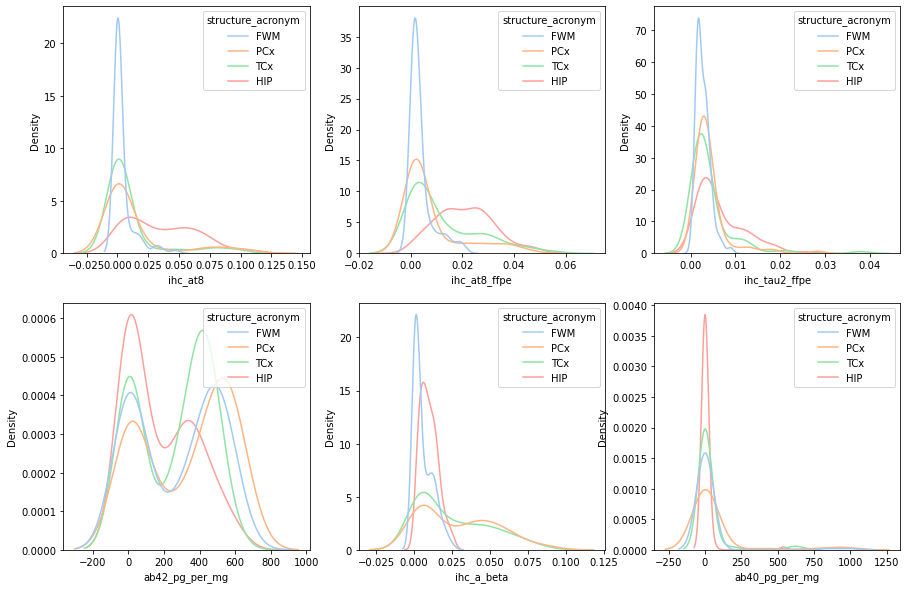

In [4]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
sns.kdeplot(data=metrics_df, x="ihc_at8",  hue="structure_acronym", ax=axs[0][0])
sns.kdeplot(data=metrics_df, x="ihc_at8_ffpe",  hue="structure_acronym", ax=axs[0][1])
sns.kdeplot(data=metrics_df, x="ihc_tau2_ffpe",  hue="structure_acronym", ax=axs[0][2])
sns.kdeplot(data=metrics_df, x="ab42_pg_per_mg",  hue="structure_acronym", ax=axs[1][0])
sns.kdeplot(data=metrics_df, x="ihc_a_beta",  hue="structure_acronym", ax=axs[1][1])
sns.kdeplot(data=metrics_df, x="ab40_pg_per_mg",  hue="structure_acronym", ax=axs[1][2])


As expected, pathological tau (AT8 IHC and pTau Luminex) tended to be higher in hippocampus while Aβ (Ab6E10 IHC and Aβ42 Luminex) is higher in cortex, consistent with known AD pathological distributions and progression.

All columns:
'donor_id', 'donor_name', 'structure_id', 'structure_acronym', 'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',        'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg', 'il_10_pg_per_mg', 'isoprostane_pg_per_mg', il_6_pg_per_mg',
       'il_1b_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg',
       'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg',
       
Columns realted to Dementia:("ihc_at8","ihc_at8_ffpe","ihc_tau2_ffpe","ihc_a_beta","ihc_a_beta_ffpe",  "ptau_ng_per_mg","tau_ng_per_mg","ab42_pg_per_mg")
  

Columns related to inflammation: ("ihc_gfap_ffpe","ihc_iba1_ffpe", "tnf_a_pg_per_mg","il_6_pg_per_mg","mip_1a_pg_per_mg",
  "il_7_pg_per_mg","mcp_1_pg_per_mg","rantes_pg_per_mg")

In [28]:
metrics_donor_df = pd.merge(metrics_df, donor_df,  how='left', left_on='donor_name', right_on = 'name')
metrics_donor_df.head()

,donor_id_x,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,0,No Dementia,3,No Dementia,N,White,Not Hispanic,No Dementia,3,2
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,1,Multiple Etiologies,9,Possible Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,0,0
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0,Alzheimer's Disease Type,18,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,5,3
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1,No Dementia,35,No Dementia,Y,White,Not Hispanic,No Dementia,3,2
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,1,No Dementia,35,No Dementia,Y,White,Not Hispanic,No Dementia,3,2


In [32]:
ab6_N = metrics_donor_df['ihc_a_beta'][(metrics_donor_df['structure_acronym']=='PCx') & (metrics_donor_df['act_demented']=='No Dementia')].reset_index(drop=True)
ab6_Y = metrics_donor_df['ihc_a_beta'][(metrics_donor_df['structure_acronym']=='PCx') & (metrics_donor_df['act_demented']=='Dementia')].reset_index(drop=True)
ab6_df=pd.concat([ab6_N,ab6_Y],axis=1)
ab6_df.columns=['No', 'Yes']
ab6_melt_df = pd.melt(ab6_df)
ab6_melt_df= ab6_melt_df.dropna()
ab6_melt_df.columns=[ 'Dementia Diagnosis?', 'Ab6E10(Parietal Cortex)']

In [ ]:
at8_N = metrics_donor_df['ihc_at8'][(metrics_donor_df['structure_acronym']=='HIP') & (metrics_donor_df['act_demented']=='No Dementia')].reset_index(drop=True)
at8_Y = metrics_donor_df['ihc_at8'][(metrics_donor_df['structure_acronym']=='HIP') & (metrics_donor_df['act_demented']=='Dementia')].reset_index(drop=True)
at8_df=pd.concat([at8_N,at8_Y],axis=1)
at8_df.columns=['No', 'Yes']
at8_melt_df = pd.melt(at8_df)
at8_melt_df= at8_melt_df.dropna()
at8_melt_df.columns=[ 'Dementia Diagnosis?', 'AT8(Hippocampus)']

<AxesSubplot:title={'center':'Ab6E10 and Dementia'}, xlabel='Dementia Diagnosis?', ylabel='Ab6E10(Parietal Cortex)'>

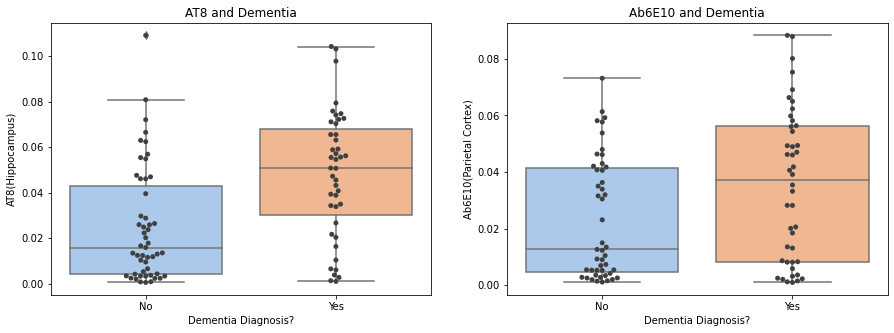

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Dementia Diagnosis?', y='AT8(Hippocampus)', data=at8_melt_df, ax=axs[0]).set(title='AT8 and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='AT8(Hippocampus)', data=at8_melt_df,color=".25", ax=axs[0])
sns.boxplot(x='Dementia Diagnosis?', y='Ab6E10(Parietal Cortex)', data=ab6_melt_df, ax=axs[1]).set(title='Ab6E10 and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='Ab6E10(Parietal Cortex)', data=ab6_melt_df,color=".25", ax=axs[1])

In [ ]:
ab42_over_ab40_ratio","isoprostane_pg_per_mg","ptau_over_tau_ratio

kpDementia=c("ihc_at8","ihc_at8_ffpe","ihc_tau2_ffpe","ihc_a_beta","ihc_a_beta_ffpe",
  "ptau_ng_per_mg","tau_ng_per_mg","ab42_pg_per_mg")
  # Pathology excluded from plot: "ab40_pg_per_mg","ihc_a_syn","a_syn_pg_per_mg","ihc_ptdp_43_ffpe"

kpInflam=c("ihc_gfap_ffpe","ihc_iba1_ffpe",
  "tnf_a_pg_per_mg","il_6_pg_per_mg","mip_1a_pg_per_mg",
  "il_7_pg_per_mg","mcp_1_pg_per_mg","rantes_pg_per_mg")
